In [1]:
import numpy as np
from scipy.integrate import trapezoid, simpson
import matplotlib.pyplot as plt

f = lambda x: 4/(1+x**2)

Dla Metoda punktów środkowych wyznaczone h_min jest równe: 1.19e-07
Dla Metoda Simpsona wyznaczone h_min jest równe: 3.89e-03
Dla Metoda trapezów wyznaczone h_min jest równe: 1.19e-07


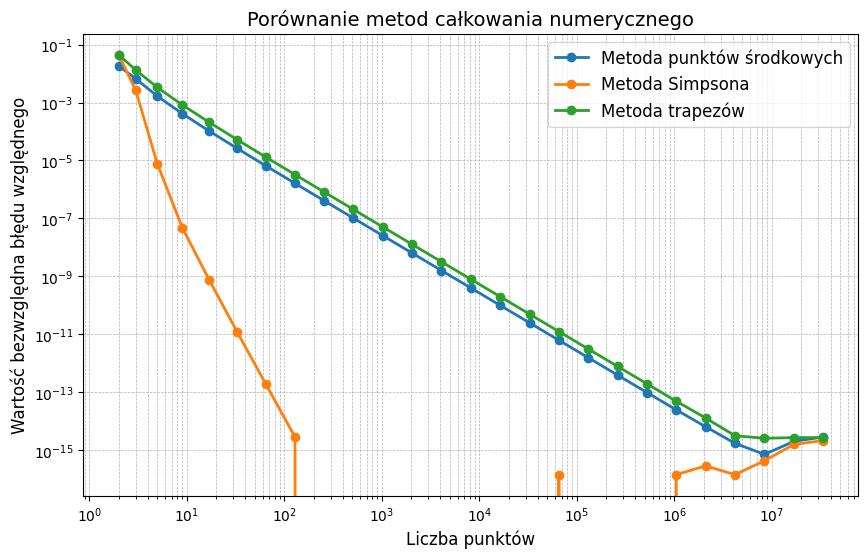

Empiryczne rzędy zbieżności:
Metoda: Metoda punktów środkowych
  Empiryczny rząd zbieżności p = 1.99
  Teoretycznie: p = 2

Metoda: Metoda Simpsona
  Empiryczny rząd zbieżności p = 6.42
  Teoretycznie: p = 4

Metoda: Metoda trapezów
  Empiryczny rząd zbieżności p = 2.00
  Teoretycznie: p = 2



In [2]:
def make_points(m: int):
    """Tworzy punkty na przedziale [0,1] z 2^m + 1 węzłami."""
    return np.linspace(0, 1, 2**m + 1)

def integrate_trapz(f, x: np.array):
    """Całkuje przy użyciu metody trapezów."""
    return trapezoid(f(x), x=x)

def integrate_simps(f, x: np.array):
    """Całkuje przy użyciu metody Simpsona."""
    return simpson(f(x), x=x)

def integrate_mid_point(f, x: np.array):
    """Całkuje przy użyciu metody punktów środkowych."""
    h = (x[-1] - x[0]) / (len(x) - 1)
    midpoints = (x[:-1] + x[1:]) / 2.0
    return h * np.sum(f(midpoints))

def integrate_gauss_legendre(f, n):
    """Całkuje funkcję f na przedziale [0, 1] przy użyciu kwadratury Gaussa-Legendre'a."""
    x, w = np.polynomial.legendre.leggauss(n)
    x = 0.5*x+0.5
    w = 0.5*w
    integral = np.sum(w*f(x))
    return integral

def calc_errors(m_array, integration_method, real_value):
    """Oblicza błąd względny dla kolejnych wartości m."""
    err_array = []
    for m in m_array:
        points = make_points(m)
        approx = integration_method(f, points)
        err_array.append(np.abs(approx - real_value) / real_value)
    return np.array(err_array)

def h_min(m_array : np.array, errors : np.array):
    index = np.argmin(errors)
    return 1 / (2 ** m_array[index] + 1)

def plot_error_comparison(integration_methods, m_max=25, real_value=np.pi):
    """Rysuje wykres porównujący błędy względne różnych metod całkowania."""
    m_values = np.arange(m_max + 1)
    # Liczba punktów dla kolejnych m: 2^m + 1
    x_values = [2**m + 1 for m in m_values]

    plt.figure(figsize=(10, 6))
    
    # Rysowanie wykresu dla każdej metody
    for label, method in integration_methods.items():
        if method == integrate_gauss_legendre:
            relative_error(f, real_value, label=label)
        else:
            errors = calc_errors(m_values, method, real_value)
            print("Dla {} wyznaczone h_min jest równe: {:.2e}".format(label, h_min(m_values, errors), ))
            plt.plot(x_values, errors, lw=2, label=label, marker = 'o')

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Liczba punktów', fontsize=12)
    plt.ylabel('Wartość bezwzględna błędu względnego', fontsize=12)
    plt.title('Porównanie metod całkowania numerycznego', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.show()

def convergence_tier(integration_methods, m_max=25, real_value=np.pi):
    m_values = np.arange(m_max + 1)
    h_values = 1 / (2 ** m_values)

    # Oblicz empiryczny rząd zbieżności – wykonujemy regresję liniową dla log(błąd) vs log(h)
    print("Empiryczne rzędy zbieżności:")
    for label, method in integration_methods.items():
        errors = calc_errors(m_values, method, real_value)
        
        # Znajdź indeks minimalnego błędu (po nim już zaczynają pojawiać się efekty błędu numerycznego)
        m_min_index = np.argmin(errors)
        # Wybieramy tylko te wartości, w których metoda zachowuje się należycie – przyjmujemy zakres do m_min_index
        valid_indices = np.arange(0, m_min_index)
        
        h_valid = h_values[valid_indices]
        errors_valid = errors[valid_indices]
        
        # Regresja liniowa: dopasowujemy równanie: log(errors) = p * log(h) + log(C)
        p, C = np.polyfit(np.log(h_valid), np.log(errors_valid), 1)
        
        print(f"Metoda: {label}")
        print(f"  Empiryczny rząd zbieżności p = {p:.2f}")
        
        # Porównujemy z wartościami teoretycznymi.
        if label in ["Metoda punktów środkowych", "Metoda trapezów"]:
            print("  Teoretycznie: p = 2")
        elif label == "Metoda Simpsona":
            print("  Teoretycznie: p = 4")
        print()

integration_methods = {
    "Metoda punktów środkowych": integrate_mid_point,
    "Metoda Simpsona": integrate_simps,
    "Metoda trapezów": integrate_trapz
}

plot_error_comparison(integration_methods)
convergence_tier(integration_methods)

n = 1:	3.2
n = 2:	3.1475409836065573
n = 3:	3.141068139963168
n = 4:	3.1416119052458047
n = 5:	3.1415926398847533
n = 6:	3.141592611187587
n = 7:	3.1415926562537497
n = 8:	3.141592653519118
n = 9:	3.141592653588244
n = 10:	3.1415926535900462
n = 11:	3.141592653589782
n = 12:	3.141592653589793
n = 13:	3.141592653589793
n = 14:	3.1415926535897927
n = 15:	3.141592653589792
n = 16:	3.141592653589793
n = 17:	3.1415926535897936
n = 18:	3.1415926535897936
n = 19:	3.141592653589793
n = 20:	3.1415926535897927


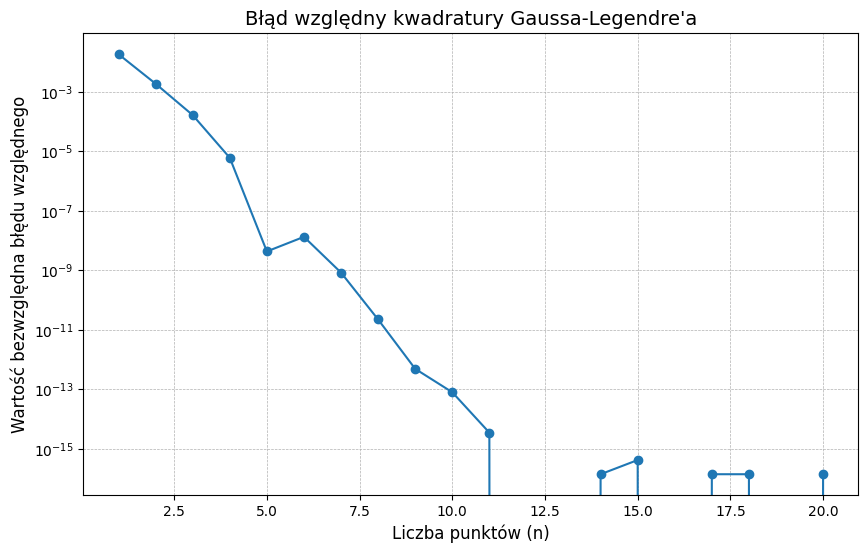

Dla Metoda punktów środkowych wyznaczone h_min jest równe: 1.19e-07
Dla Metoda Simpsona wyznaczone h_min jest równe: 3.89e-03
Dla Metoda trapezów wyznaczone h_min jest równe: 1.19e-07
n = 1:	3.2
n = 2:	3.1475409836065573
n = 3:	3.141068139963168
n = 4:	3.1416119052458047
n = 5:	3.1415926398847533
n = 6:	3.141592611187587
n = 7:	3.1415926562537497
n = 8:	3.141592653519118
n = 9:	3.141592653588244
n = 10:	3.1415926535900462
n = 11:	3.141592653589782
n = 12:	3.141592653589793
n = 13:	3.141592653589793
n = 14:	3.1415926535897927
n = 15:	3.141592653589792
n = 16:	3.141592653589793
n = 17:	3.1415926535897936
n = 18:	3.1415926535897936
n = 19:	3.141592653589793
n = 20:	3.1415926535897927


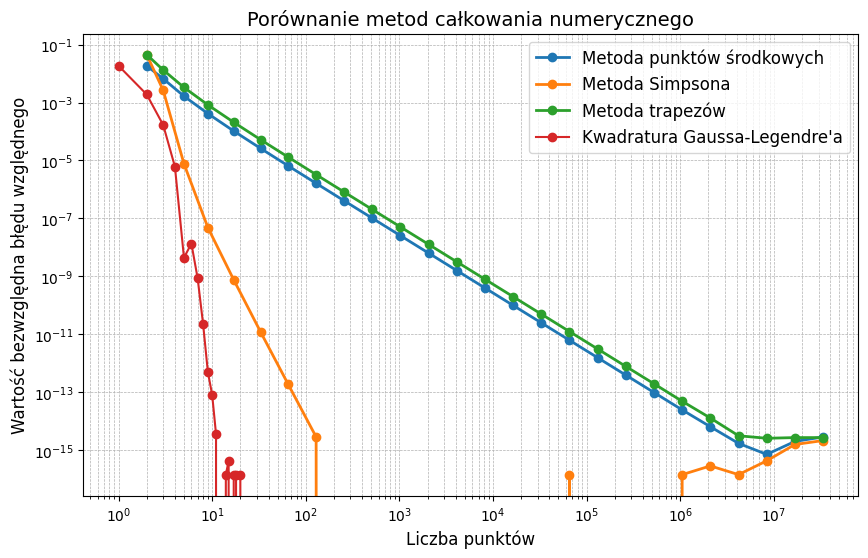

<function __main__.integrate_gauss_legendre(f, n)>

In [3]:
# Task 2
def relative_error(f, real_value, label):
    """Rysuje wykres bezwzględnej wartości błędu względnego dla różnych wartości n."""
    n_values = np.arange(1, 21)
    errors = []
    
    for n in n_values:
        approx = integrate_gauss_legendre(f, n)
        error = np.abs(approx - real_value) / real_value
        errors.append(error)
    
        print(f"n = {n}:\t{approx}")
    plt.plot(n_values, errors, marker='o', label=label)
    
def plot_relative_error(f, real_value, label):
    """Rysuje wykres bezwzględnej wartości błędu względnego dla różnych wartości n."""
    plt.figure(figsize=(10, 6))
    relative_error(f, real_value, label)
    plt.yscale('log')
    plt.xlabel('Liczba punktów (n)', fontsize=12)
    plt.ylabel('Wartość bezwzględna błędu względnego', fontsize=12)
    plt.title('Błąd względny kwadratury Gaussa-Legendre\'a', fontsize=14)
    plt.grid(True, which="both", ls="--", lw=0.5)
    plt.show()

plot_relative_error(f, np.pi, "Kwadratura Gaussa-Legendre'a")
integration_methods["Kwadratura Gaussa-Legendre'a"] = integrate_gauss_legendre
plot_error_comparison(integration_methods)
integration_methods.pop("Kwadratura Gaussa-Legendre'a")
